In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mysql.connector

In [3]:
import mysql.connector
mydb = mysql.connector.connect(host='localhost',user='root',passwd='nadeem123',database = 'classicmodels')

In [4]:
cursordb = mydb.cursor()

In [5]:
cursordb.execute('show tables;')
cursordb.fetchall()

[('customer_wise_orders',),
 ('customers',),
 ('employees',),
 ('offices',),
 ('orderdetails',),
 ('orders',),
 ('payments',),
 ('productlines',),
 ('products',)]

In [6]:
cursordb.execute('select * from offices;')
offices_col = cursordb.column_names
offices = cursordb.fetchall()
offices = pd.DataFrame(offices,columns = offices_col)

In [7]:
offices.head()

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan


In [8]:
offices.isnull().sum()

officeCode      0
city            0
phone           0
addressLine1    0
addressLine2    2
state           3
country         0
postalCode      0
territory       0
dtype: int64

In [9]:
cursordb.execute('select * from orders;')
orders_col = cursordb.column_names
orders = cursordb.fetchall()
orders = pd.DataFrame(orders,columns = orders_col)

In [10]:
orders.head()

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


In [11]:
orders.isnull().sum()

orderNumber         0
orderDate           0
requiredDate        0
shippedDate        14
status              0
comments          246
customerNumber      0
dtype: int64

In [12]:
cursordb.execute('select * from employees;')
emp_col = cursordb.column_names
employees = cursordb.fetchall()
employees = pd.DataFrame(employees,columns = emp_col)


In [13]:
employees.head()

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)


In [14]:
employees.isnull().sum()

employeeNumber    0
lastName          0
firstName         0
extension         0
email             0
officeCode        0
reportsTo         1
jobTitle          0
dtype: int64

In [15]:
cursordb.execute('select * from customers;')
cust_col = cursordb.column_names
customers = cursordb.fetchall()

In [16]:
customers = pd.DataFrame(customers,columns = cust_col)

In [17]:
customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00


In [18]:
customers.isnull().sum()

customerNumber              0
customerName                0
contactLastName             0
contactFirstName            0
phone                       0
addressLine1                0
addressLine2              100
city                        0
state                      73
postalCode                  7
country                     0
salesRepEmployeeNumber     22
creditLimit                 0
dtype: int64

In [19]:
cursordb.execute('select * from orderdetails;')
od_col = cursordb.column_names
orderdetails = cursordb.fetchall()
orderdetails = pd.DataFrame(orderdetails, columns = od_col)

In [20]:
orderdetails.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


In [21]:
orderdetails.isnull().sum()

orderNumber        0
productCode        0
quantityOrdered    0
priceEach          0
orderLineNumber    0
dtype: int64

In [22]:
cursordb.execute('select * from payments;')
pay_col = cursordb.column_names
payments = cursordb.fetchall()
payments = pd.DataFrame(payments, columns = pay_col)

In [23]:
payments.head()

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98


In [24]:
payments.isnull().sum()

customerNumber    0
checkNumber       0
paymentDate       0
amount            0
dtype: int64

In [25]:
cursordb.execute('select * from productlines;')
productlines_col = cursordb.column_names
productlines = cursordb.fetchall()
productlines = pd.DataFrame(productlines,columns= productlines_col)

In [26]:
productlines.head()

,productLine,textDescription,htmlDescription,image
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
1,Motorcycles,Our motorcycles are state of the art replicas ...,None,None
2,Planes,"Unique, diecast airplane and helicopter replic...",None,None
3,Ships,The perfect holiday or anniversary gift for ex...,None,None
4,Trains,Model trains are a rewarding hobby for enthusi...,None,None


In [27]:
productlines.isnull().sum()

productLine        0
textDescription    0
htmlDescription    7
image              7
dtype: int64

In [28]:
cursordb.execute('select * from products;')
product_col = cursordb.column_names
products = cursordb.fetchall()
products = pd.DataFrame(products,columns= product_col)

In [29]:
products.isnull().sum()

productCode           0
productName           0
productLine           0
productScale          0
productVendor         0
productDescription    0
quantityInStock       0
buyPrice              0
MSRP                  0
dtype: int64

In [30]:
products.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [31]:
cursordb.execute('SELECT p.productname, sum(od.quantityordered) \
                  FROM classicmodels.orderdetails \
                  od INNER JOIN classicmodels.products p \
                  ON p.productcode = od.productcode GROUP BY 1 order by 2 desc limit 10; ')
col_name = cursordb.column_names
data = cursordb.fetchall()
product_quantity = pd.DataFrame(data,columns = col_name)

In [32]:
product_quantity.head()

,productname,sum(od.quantityordered)
0,1992 Ferrari 360 Spider red,1808
1,1937 Lincoln Berline,1111
2,American Airlines: MD-11S,1085
3,1941 Chevrolet Special Deluxe Cabriolet,1076
4,1930 Buick Marquette Phaeton,1074


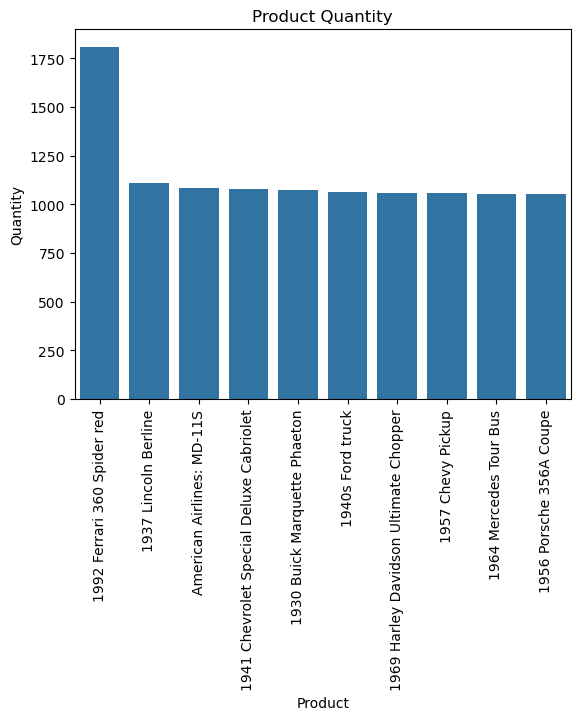

In [34]:
sns.barplot(x = 'productname', y = 'sum(od.quantityordered)',data = product_quantity)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Product Quantity')
plt.xticks(rotation = 90)
plt.show()